In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sn
import os
import matplotlib.pyplot as plt

In [2]:
output_folder="../../../output_hyperparameters/"

In [3]:
def get_accuracy_matrix(models,datasets):
    matrix_acc_val = np.zeros(shape=(len(datasets),len(models)))    
    matrix_loss_val = np.zeros(shape=(len(datasets),len(models)))
    for idx_m, model in enumerate(models):
        for idx_d, (dataset, version) in enumerate(datasets):
            df_tmp = pd.read_csv(os.path.join(output_folder, f"{dataset}/{model}/{version}/metrics.csv"))            

            # print(float(df_tmp[df_tmp['acc/val'] == df_tmp['acc/val'].max()]['acc/val'].values[0]))
            matrix_acc_val[idx_d,idx_m] = float(df_tmp[df_tmp['acc/val'] == df_tmp['acc/val'].max()]['acc/val'].values[0])
            matrix_loss_val[idx_d,idx_m] = float(df_tmp[df_tmp['acc/val'] == df_tmp['acc/val'].max()]['loss/val'].values[0])
            
    return matrix_acc_val,matrix_loss_val

In [4]:
def heatmap(matrix, rows, columns,heat_range=()):
    df_cm = pd.DataFrame(matrix, index = [i[0] for i in rows],
                      columns = [i for i in columns])
    plt.figure(figsize = (10,7))
    if heat_range==():
        sn.heatmap(df_cm, annot=True)
    else:
        sn.heatmap(df_cm, annot=True,vmin=heat_range[0],vmax=heat_range[1])

## RUN 1
### Models: 
- Densenet121
- Resnet50
- Resnet9
- Vgg16

### Datasets:
- CIFAR10 (Batchsize: 256)
- CIFAR100 (Batchsize: 256)
- Fashionmnist (Batchsize: 256)
- FractalDB (Batchsize: 256, InitialImageSize: 64x64, NumberOfImages: 60k)
- Grocerystore (Batchsize: 256, InitialImageSize: 348x348, NumberOfImages: 5125)
- histaerial_1 (Batchsize: 256, InitialImageSize: 25x25, NumberOfImages: ~4.9Mio)
- histaerial_2 (Batchsize: 256, InitialImageSize: 50x50, NumberOfImages: ~4.9Mio)
- svhn (Batchsize: 256)
- tinyimagenet (Batchsize: 256, InitialImageSize: 64x64)

In [5]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_0'),
              ('cifar100','version_0'),
              ('fashionmnist','version_0'),
              ('fractaldb60','version_0'),
              ('grocerystore','version_0'),
              ('histaerial25x25','version_0'),
              ('histaerial50x50','version_0'),
              ('svhn','version_0'),
              ('tinyimagenet','version_0')]

In [6]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

In [11]:
print(matrix_acc_val)
print(matrix_loss_val)

[[93.59976196 93.14903259 94.53125    93.60977173]
 [73.59775543 72.59615326 75.40063477 70.65304565]
 [94.11058044 93.71995544 94.52124023 94.11058044]
 [ 4.65141869  4.22455978  5.71734381  4.45052576]
 [53.515625   44.140625   59.765625   50.78125   ]
 [62.27532196 39.23801041 46.02819061 44.3259201 ]
 [49.42312241 66.57236481 68.7973175  57.03125   ]
 [96.18270111 95.88490295 96.07441711 95.99319458]
 [43.12900543 44.02043152 46.40424728 32.19150543]]
[[ 0.27499142  0.26477861  0.18565831  0.24004462]
 [ 1.14067364  1.14587331  0.97045648  1.36750448]
 [ 0.21156615  0.26516625  0.19041206  0.23056266]
 [ 6.30125284  6.46550083  6.74659967 10.40431976]
 [ 1.56011009  2.02066898  1.36295831  1.60096598]
 [ 1.14078927  1.83416414  1.46437252  1.76681209]
 [ 1.38528895  1.15882421  0.9694792   1.29773152]
 [ 0.16994162  0.16275284  0.15755755  0.16708653]
 [ 2.62157226  2.51062679  2.28642821  3.23368454]]


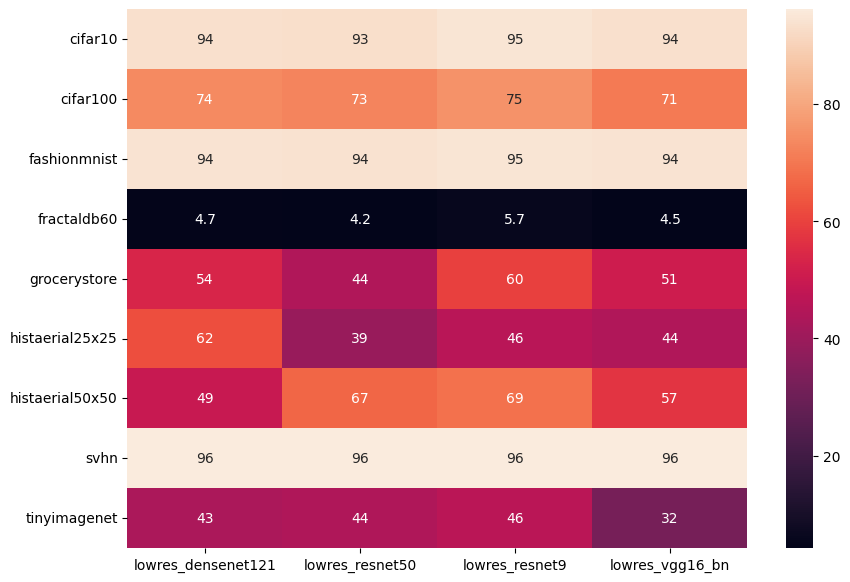

In [8]:
heatmap(matrix_acc_val,all_datasets,all_models)

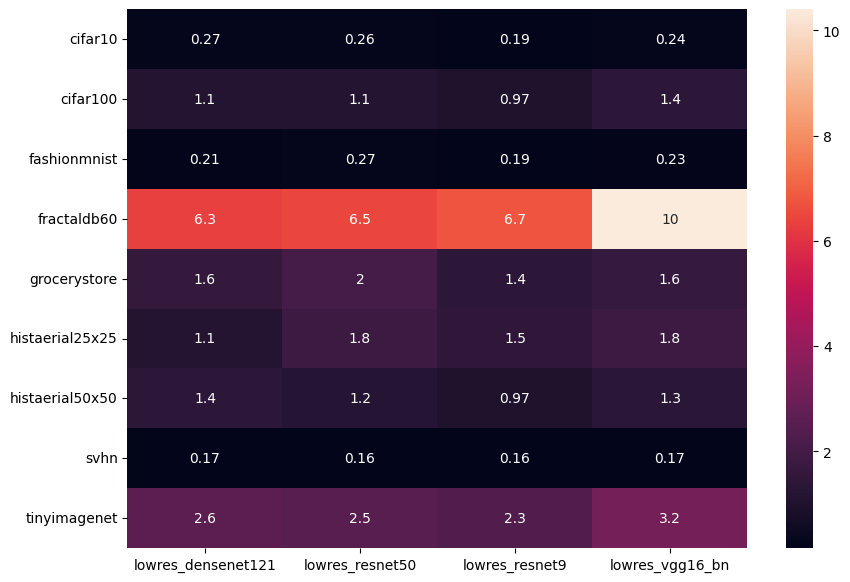

In [9]:
heatmap(matrix_loss_val,all_datasets,all_models)

### Problems
FractalDB performs terrible on every model, but the images are 64x64 and get resized to 32x32. Maybe smaller images could bypass the resizing

## RUN 2
### Models: 
- Densenet121
- Resnet50
- Resnet9
- Vgg16

### Datasets:
- CIFAR10 (Batchsize: 256)
- CIFAR100 (Batchsize: 256)
- Fashionmnist (Batchsize: 256)
- <div class="alert-info">FractalDB (Batchsize: 256, InitialImageSize: 32x32, NumberOfImages: 60k)</div>
- Grocerystore (Batchsize: 256, InitialImageSize: 348x348, NumberOfImages: 5125)
- histaerial_1 (Batchsize: 256, InitialImageSize: 25x25, NumberOfImages: ~4.9Mio)
- histaerial_2 (Batchsize: 256, InitialImageSize: 50x50, NumberOfImages: ~4.9Mio)
- svhn (Batchsize: 256)
- tinyimagenet (Batchsize: 256, InitialImageSize: 64x64)

In [12]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_0'),
              ('cifar100','version_0'),
              ('fashionmnist','version_0'),
              ('fractaldb60','version_1'),
              ('grocerystore','version_0'),
              ('histaerial25x25','version_0'),
              ('histaerial50x50','version_0'),
              ('svhn','version_0'),
              ('tinyimagenet','version_0')]

In [13]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

In [14]:
print(matrix_acc_val)
print(matrix_loss_val)

[[93.59976196 93.14903259 94.53125    93.60977173]
 [73.59775543 72.59615326 75.40063477 70.65304565]
 [94.11058044 93.71995544 94.52124023 94.11058044]
 [ 0.          0.          0.          0.        ]
 [53.515625   44.140625   59.765625   50.78125   ]
 [62.27532196 39.23801041 46.02819061 44.3259201 ]
 [49.42312241 66.57236481 68.7973175  57.03125   ]
 [96.18270111 95.88490295 96.07441711 95.99319458]
 [43.12900543 44.02043152 46.40424728 32.19150543]]
[[ 0.27499142  0.26477861  0.18565831  0.24004462]
 [ 1.14067364  1.14587331  0.97045648  1.36750448]
 [ 0.21156615  0.26516625  0.19041206  0.23056266]
 [ 8.09003735 11.64327335 36.34787369 13.71606064]
 [ 1.56011009  2.02066898  1.36295831  1.60096598]
 [ 1.14078927  1.83416414  1.46437252  1.76681209]
 [ 1.38528895  1.15882421  0.9694792   1.29773152]
 [ 0.16994162  0.16275284  0.15755755  0.16708653]
 [ 2.62157226  2.51062679  2.28642821  3.23368454]]


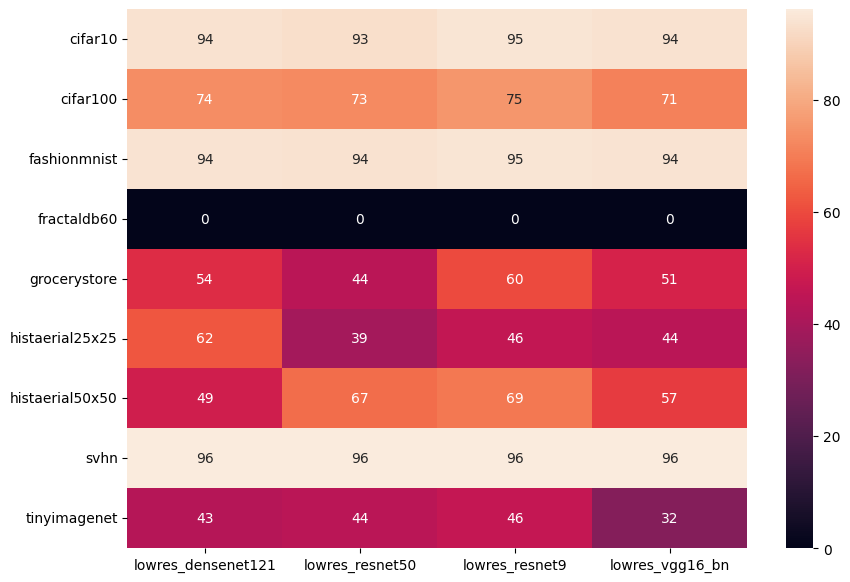

In [15]:
heatmap(matrix_acc_val,all_datasets,all_models)

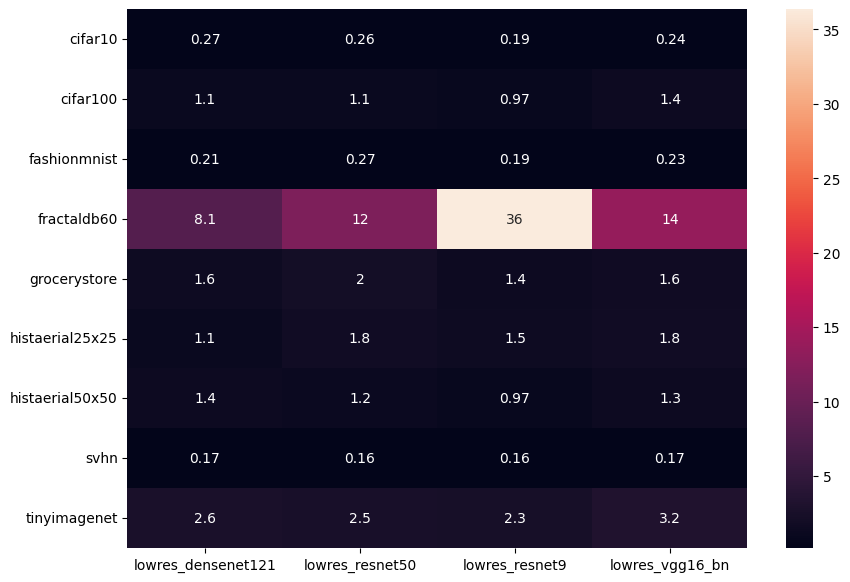

In [16]:
heatmap(matrix_loss_val,all_datasets,all_models)

### Problems
The fractaldb val accuracy and loss got worse. Propertly the reason is the generation of the images in small sizes destroys the information. 

Large examples generated from fractaldb have very clear structures, which are seemingly distinguishable. In contrast the small images, in particular 32x32 look like blob-shaped objects.

The 64x64 have more information and more data could be helpful

## RUN 3
### Models: 
- Densenet121
- Resnet50
- Resnet9
- Vgg16

### Datasets:
- CIFAR10 (Batchsize: 256)
- CIFAR100 (Batchsize: 256)
- Fashionmnist (Batchsize: 256)
- <div class="alert-info">FractalDB (Batchsize: 256, InitialImageSize: 64x64, NumberOfImages: 600k)</div>
- Grocerystore (Batchsize: 256, InitialImageSize: 348x348, NumberOfImages: 5125)
- <div class="alert-info">histaerial_1 (Batchsize: 512, InitialImageSize: 25x25, NumberOfImages: ~4.9Mio)</div>
- histaerial_2 (Batchsize: 256, InitialImageSize: 50x50, NumberOfImages: ~4.9Mio)
- svhn (Batchsize: 256)
- <div class="alert-info">tinyimagenet (Batchsize: 64, InitialImageSize: 64x64)</div>

In [17]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_0'),
              ('cifar100','version_0'),
              ('fashionmnist','version_0'),
              ('fractaldb60','version_2'),
              ('grocerystore','version_0'),
              ('histaerial25x25','version_1'),
              ('histaerial50x50','version_0'),
              ('svhn','version_0'),
              ('tinyimagenet','version_1')]

In [18]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

In [19]:
print(matrix_acc_val)
print(matrix_loss_val)

[[93.59976196 93.14903259 94.53125    93.60977173]
 [73.59775543 72.59615326 75.40063477 70.65304565]
 [94.11058044 93.71995544 94.52124023 94.11058044]
 [ 0.          0.          0.          0.        ]
 [53.515625   44.140625   59.765625   50.78125   ]
 [33.72222519 30.40477562 60.48986053 50.35695267]
 [49.42312241 66.57236481 68.7973175  57.03125   ]
 [96.18270111 95.88490295 96.07441711 95.99319458]
 [28.79179955 32.80254745 43.96894836 23.06926727]]
[[ 0.27499142  0.26477861  0.18565831  0.24004462]
 [ 1.14067364  1.14587331  0.97045648  1.36750448]
 [ 0.21156615  0.26516625  0.19041206  0.23056266]
 [ 6.30737066  7.05816889  6.59773064 10.53573704]
 [ 1.56011009  2.02066898  1.36295831  1.60096598]
 [ 1.96853006  2.1425972   1.30317235  1.6634475 ]
 [ 1.38528895  1.15882421  0.9694792   1.29773152]
 [ 0.16994162  0.16275284  0.15755755  0.16708653]
 [ 3.297328    2.99355054  2.43197966  3.53331757]]


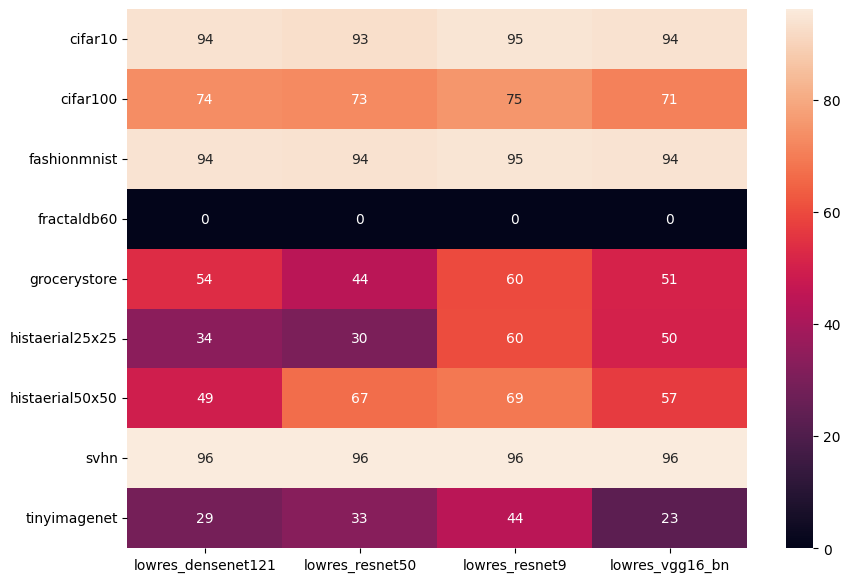

In [20]:
heatmap(matrix_acc_val,all_datasets,all_models)

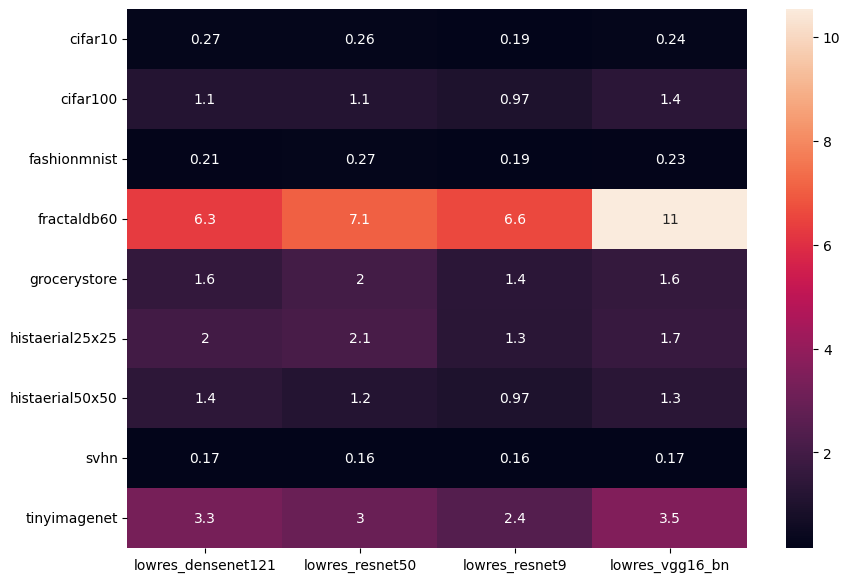

In [21]:
heatmap(matrix_loss_val,all_datasets,all_models)

### Problems
Even with more data the fractaldb performs tedious.

Another dataset research was to see if the histaerial 25x25 dataset performs better/worse on an higher batchsize in relation to the training time. As expected the performance is worse for the larger models with no significant difference in training time.

To decease the batchsize of tinyimagenet was Paul's idea to improve performance, but unfortunately tinyimagenet performed worse 

## Finetuning RUN 1
### Models: 
- Densenet121
- Resnet50
- Resnet9

### Datasets:
- CIFAR10 (Batchsize: 512)

### CIFAR-10

In [17]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9']
all_datasets=[('cifar10','version_1'),
              ('cifar10','version_2'),
              ('cifar10','version_3'),
              # ('cifar10','version_4'),
              # ('cifar10','version_5'),
              ('cifar10','version_6'),
              ('cifar10','version_7')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [18]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

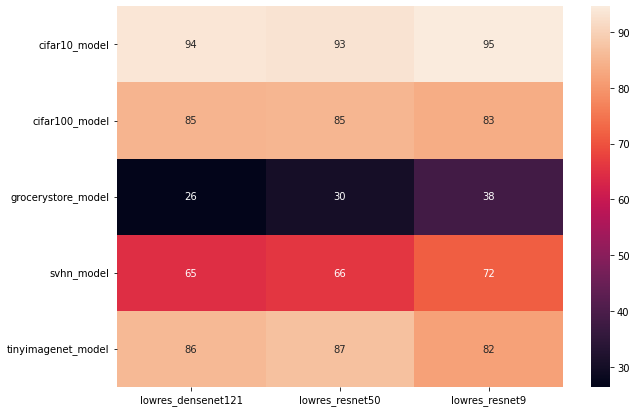

In [19]:
heatmap(matrix_acc_val,columns,all_models)

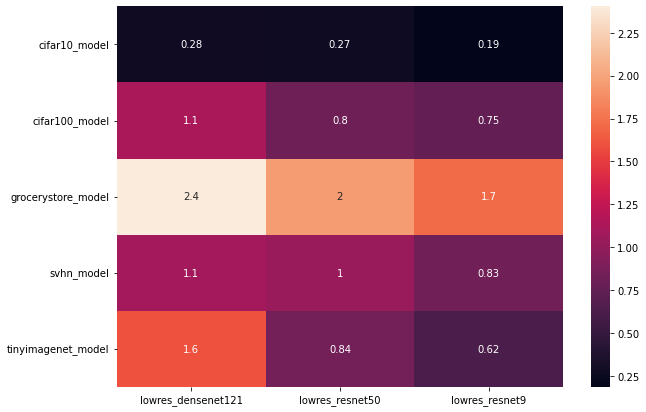

In [20]:
heatmap(matrix_loss_val,columns,all_models)

In [21]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              # ('histaerial25x25','version_0'),
              # ('histaerial50x50','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [22]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

In [23]:
print(matrix_acc_before_val)

[[93.59976196 93.14903259 94.53125   ]
 [93.59976196 93.14903259 94.53125   ]
 [93.59976196 93.14903259 94.53125   ]
 [93.59976196 93.14903259 94.53125   ]
 [93.59976196 93.14903259 94.53125   ]]


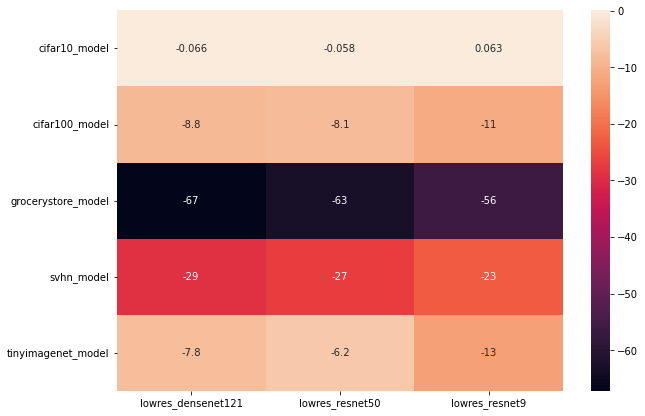

In [24]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

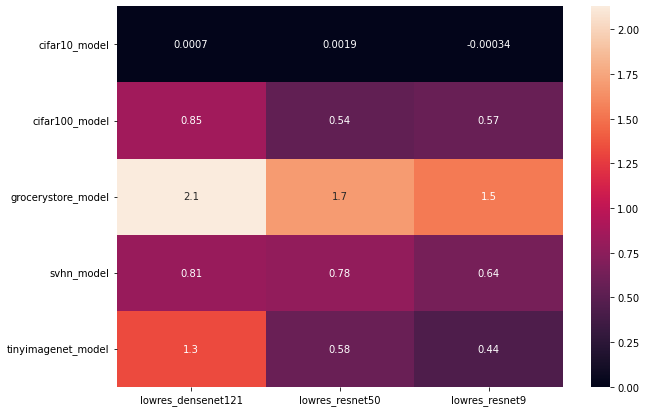

In [25]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 2
### Models: 
- Densenet121
- Resnet50
- Resnet9

### Datasets:
- CIFAR10 (Batchsize: 128)

### CIFAR-10

In [26]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9']
all_datasets=[('cifar10','version_8'),
              ('cifar10','version_9'),
              ('cifar10','version_10'),
              # ('cifar10','version_11'),
              # ('cifar10','version_12'),
              ('cifar10','version_13'),
              ('cifar10','version_14')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [27]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

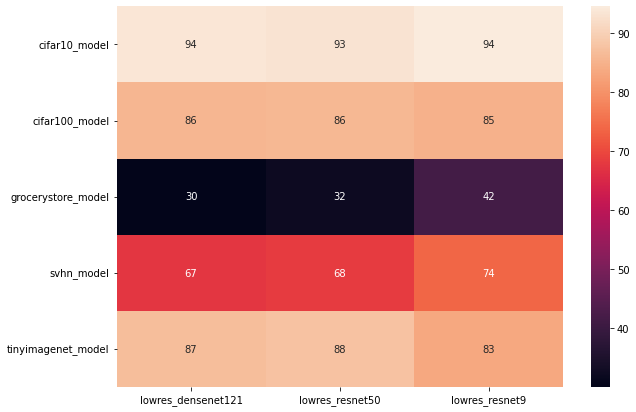

In [28]:
heatmap(matrix_acc_val,columns,all_models)

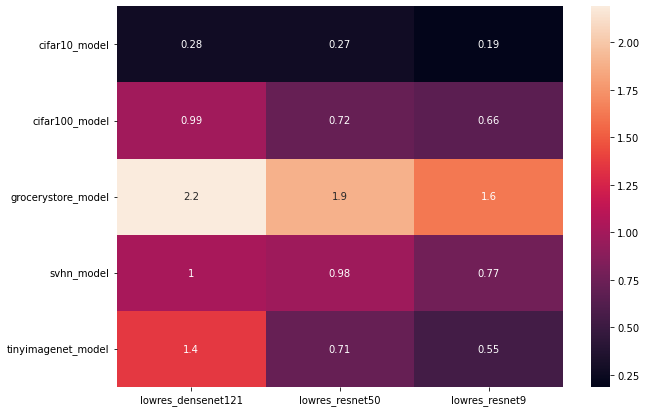

In [29]:
heatmap(matrix_loss_val,columns,all_models)

In [30]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              # ('histaerial25x25','version_0'),
              # ('histaerial50x50','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [31]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

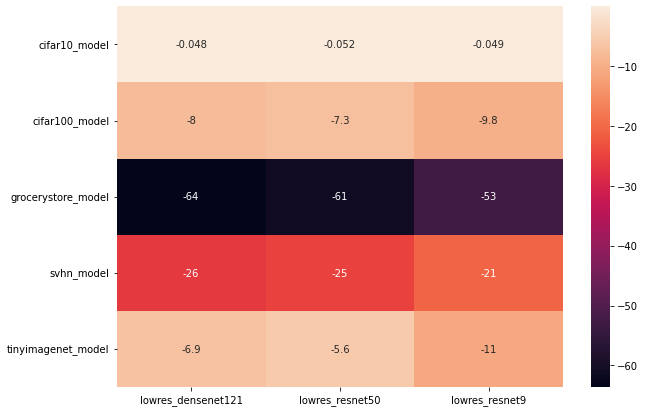

In [32]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

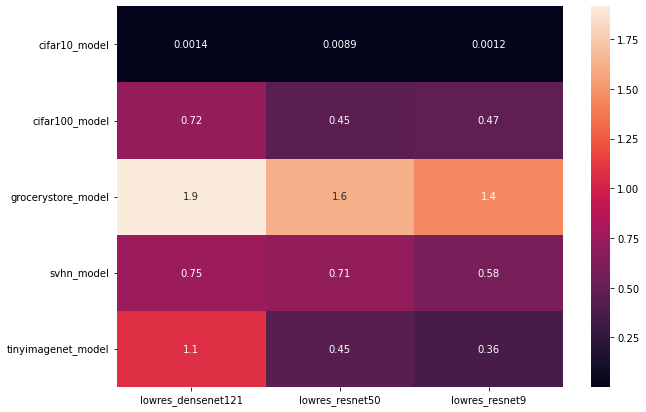

In [33]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 3
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-5
- Epochs: 10
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [34]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_15'),
              ('cifar10','version_16'),
              ('cifar10','version_17'),
              ('cifar10','version_18'),
              ('cifar10','version_19'),
              ('cifar10','version_20'),
              ('cifar10','version_21')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [35]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

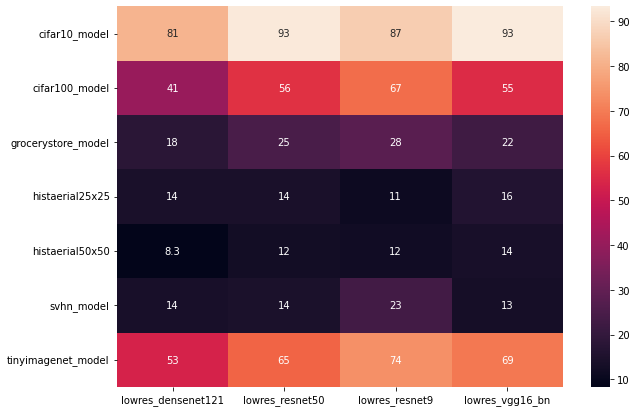

In [36]:
heatmap(matrix_acc_val,columns,all_models)

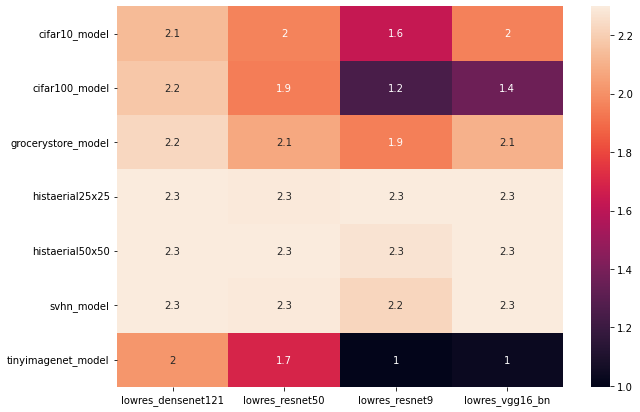

In [37]:
heatmap(matrix_loss_val,columns,all_models)

In [38]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [39]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

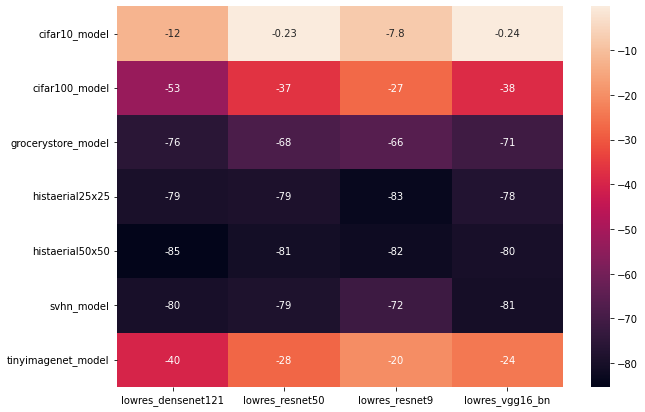

In [40]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

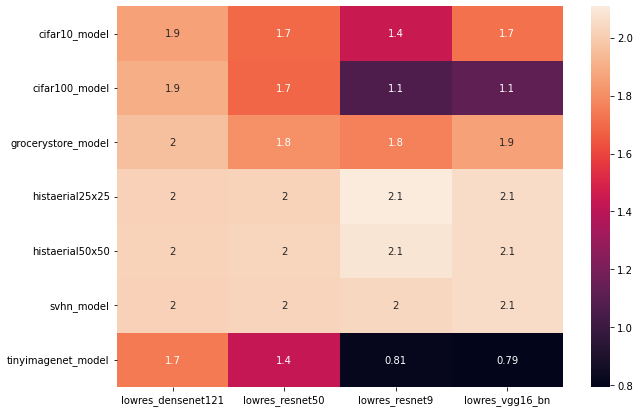

In [41]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 4
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-3
- Epochs: 10
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [42]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_22'),
              ('cifar10','version_23'),
              ('cifar10','version_24'),
              ('cifar10','version_25'),
              ('cifar10','version_26'),
              ('cifar10','version_27'),
              ('cifar10','version_28')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [43]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

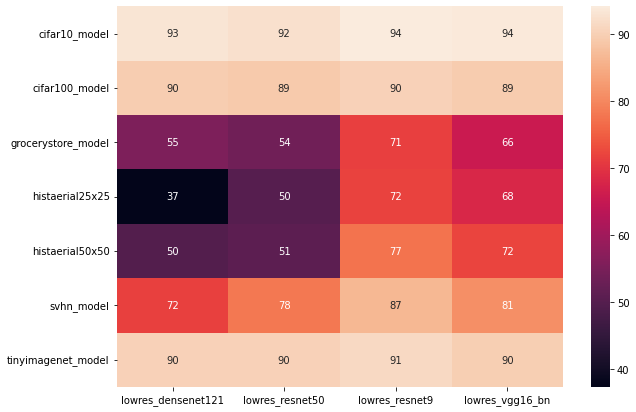

In [44]:
heatmap(matrix_acc_val,columns,all_models)

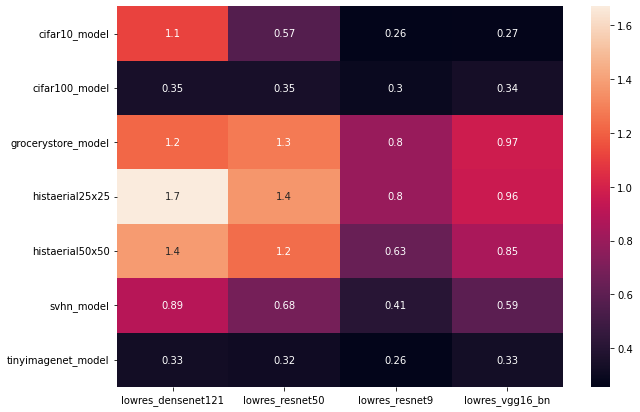

In [45]:
heatmap(matrix_loss_val,columns,all_models)

In [46]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [47]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

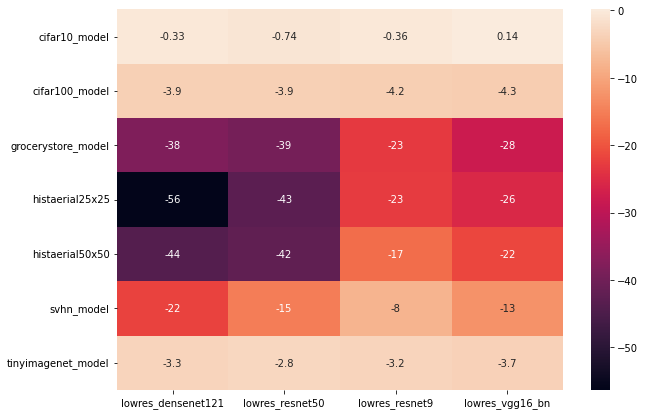

In [48]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

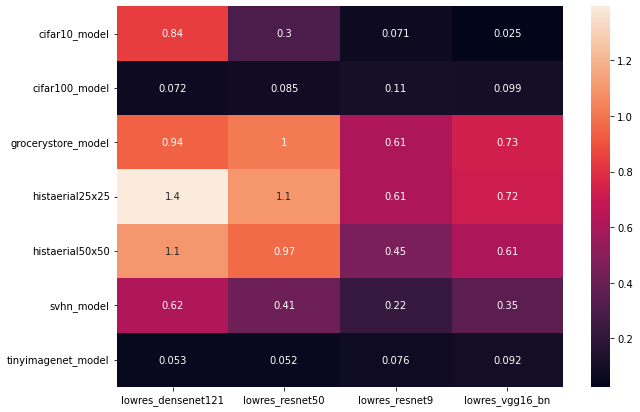

In [49]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 5
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-3
- Epochs: 10
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [50]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_29'),
              ('cifar10','version_30'),
              ('cifar10','version_31'),
              ('cifar10','version_32'),
              ('cifar10','version_33'),
              ('cifar10','version_34'),
              ('cifar10','version_35')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [51]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

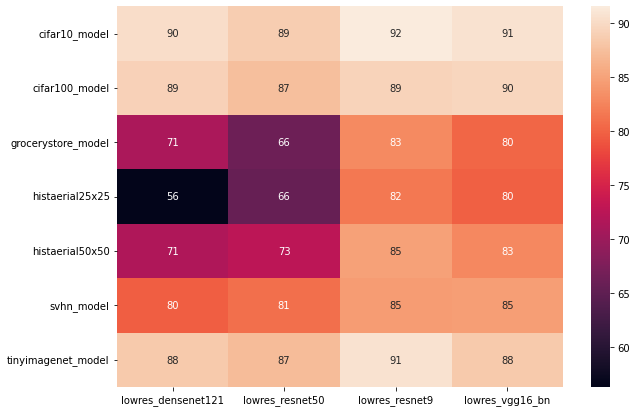

In [52]:
heatmap(matrix_acc_val,columns,all_models)

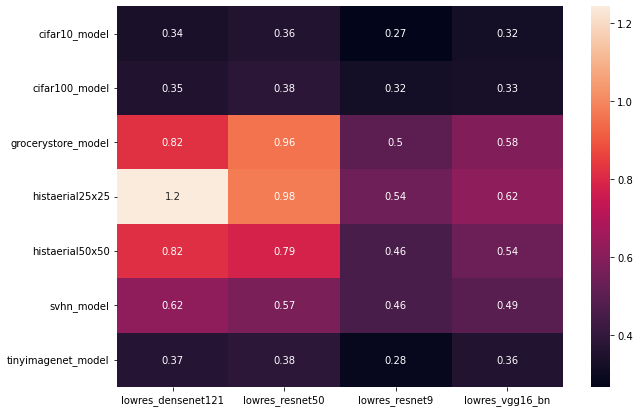

In [53]:
heatmap(matrix_loss_val,columns,all_models)

In [54]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [55]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

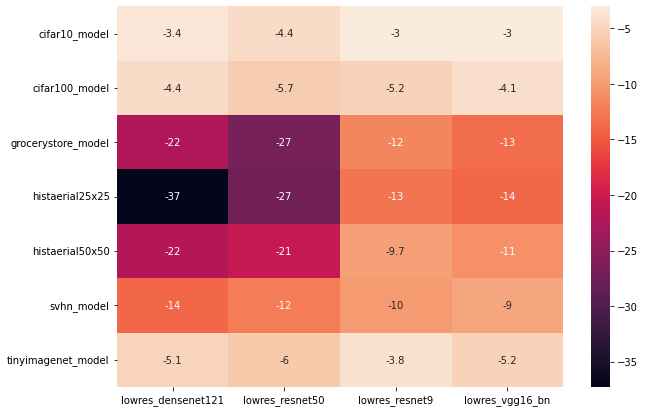

In [56]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

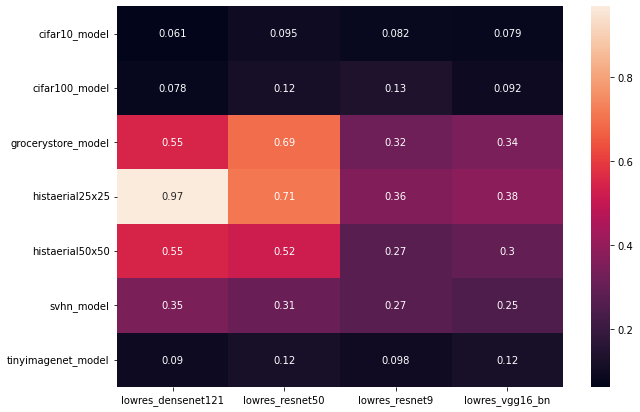

In [57]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 6
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 256)

### Parameters
- Learningrate: 1e-2
- Epochs: 10
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [58]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_36'),
              ('cifar10','version_37'),
              ('cifar10','version_38'),
              ('cifar10','version_39'),
              ('cifar10','version_40'),
              ('cifar10','version_41'),
              ('cifar10','version_42')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [59]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

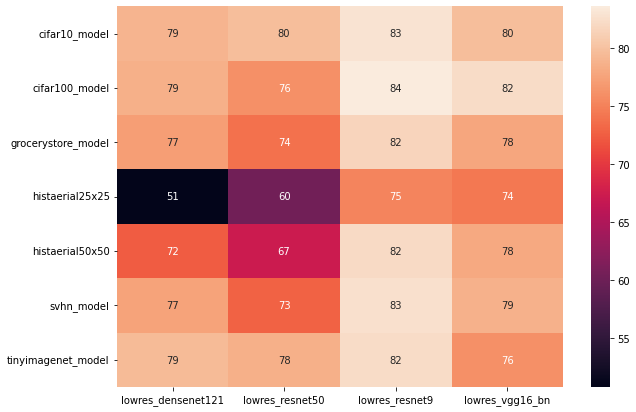

In [60]:
heatmap(matrix_acc_val,columns,all_models)

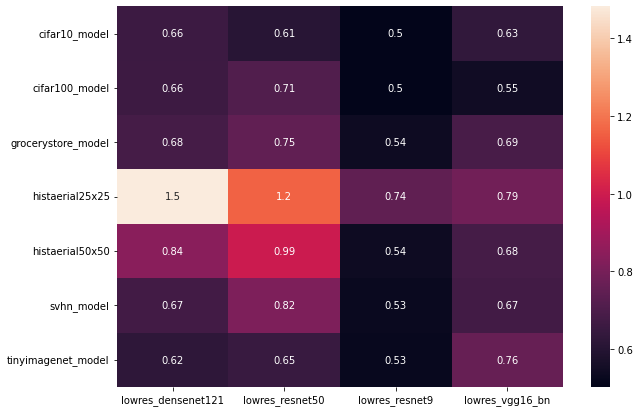

In [61]:
heatmap(matrix_loss_val,columns,all_models)

In [62]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [63]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

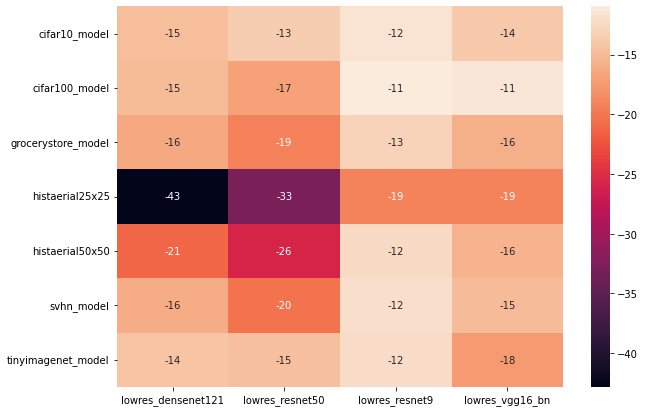

In [64]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

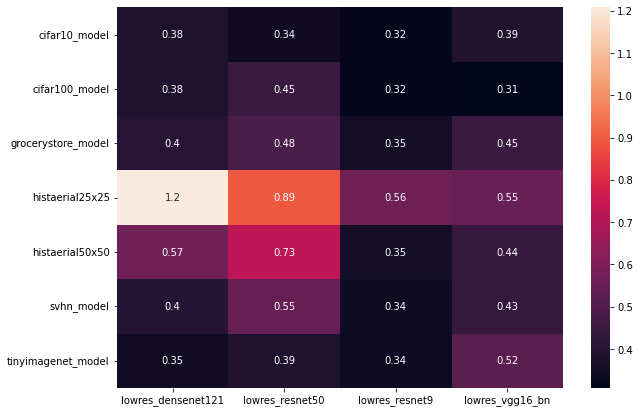

In [65]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 7
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-2
- Epochs: 10
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [66]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_43'),
              ('cifar10','version_44'),
              ('cifar10','version_45'),
              ('cifar10','version_46'),
              ('cifar10','version_47'),
              ('cifar10','version_48'),
              ('cifar10','version_49')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [67]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

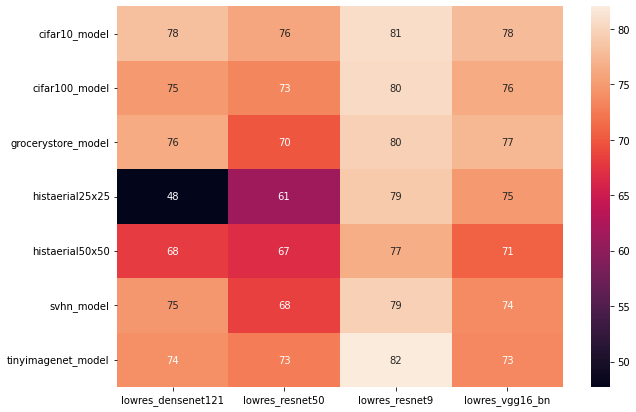

In [68]:
heatmap(matrix_acc_val,columns,all_models)

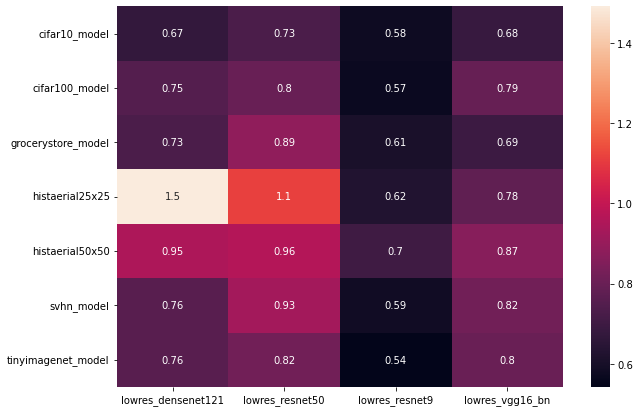

In [69]:
heatmap(matrix_loss_val,columns,all_models)

In [70]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [71]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

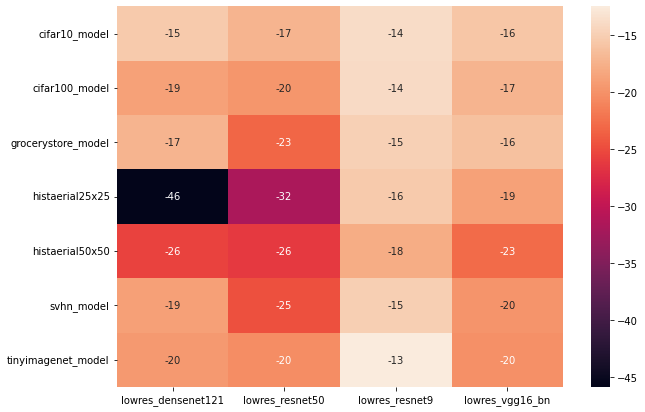

In [72]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

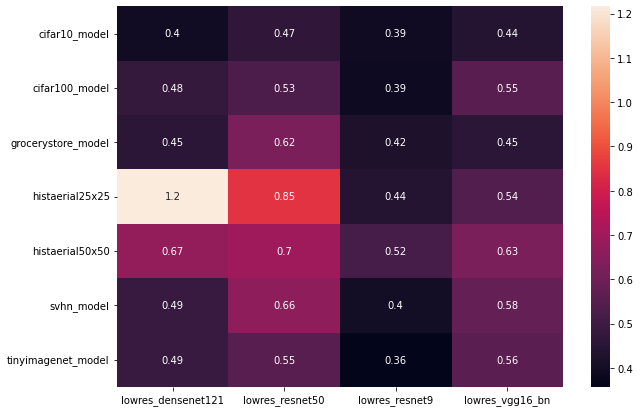

In [73]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 8
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-3
- Epochs: 20
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [74]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_50'),
              ('cifar10','version_51'),
              ('cifar10','version_52'),
              ('cifar10','version_53'),
              ('cifar10','version_54'),
              ('cifar10','version_55'),
              ('cifar10','version_56')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [75]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

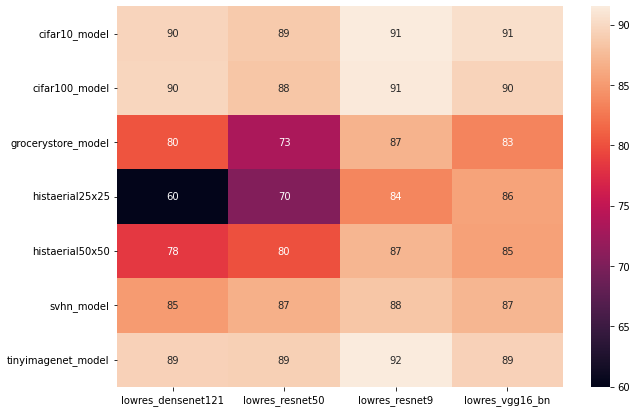

In [76]:
heatmap(matrix_acc_val,columns,all_models)

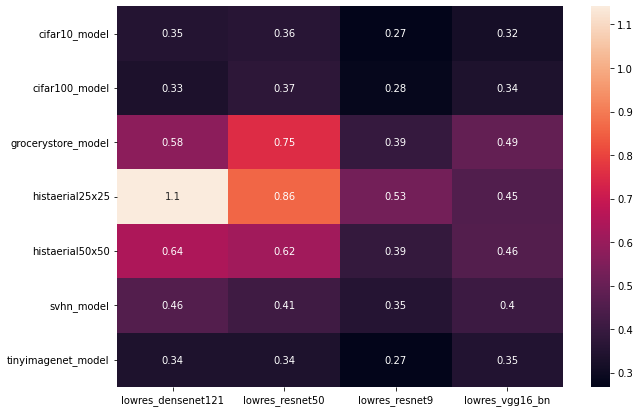

In [77]:
heatmap(matrix_loss_val,columns,all_models)

In [78]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [79]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

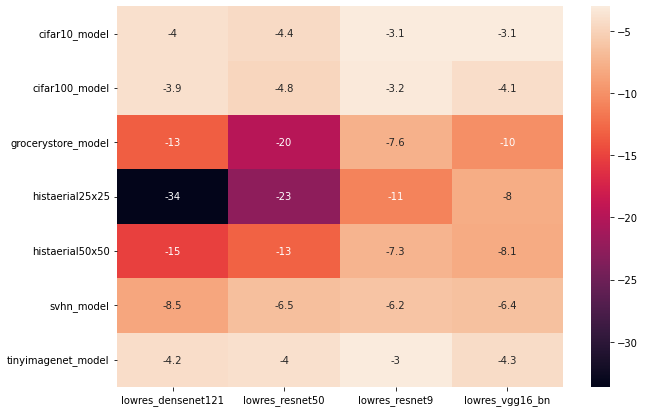

In [80]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

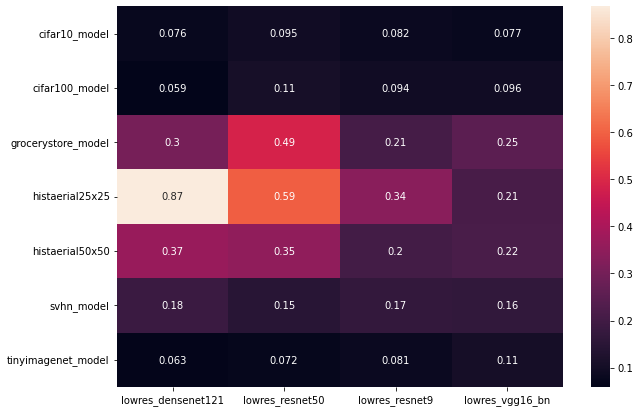

In [81]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 9
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-3
- Epochs: 10
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [82]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_57'),
              ('cifar10','version_58'),
              ('cifar10','version_59'),
              ('cifar10','version_60'),
              ('cifar10','version_61'),
              ('cifar10','version_62'),
              ('cifar10','version_63')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [83]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

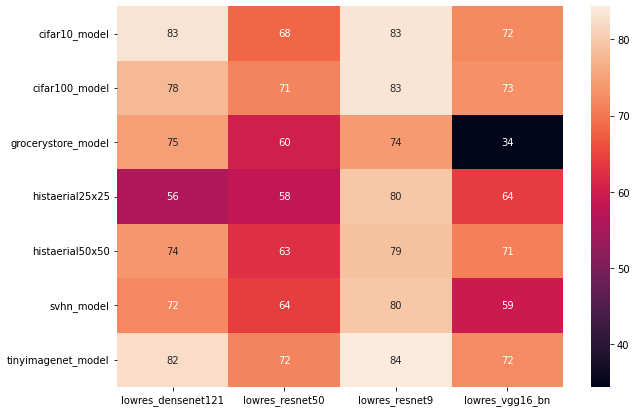

In [84]:
heatmap(matrix_acc_val,columns,all_models)

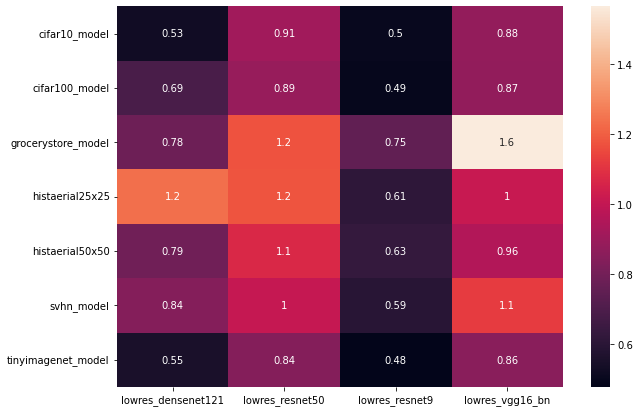

In [85]:
heatmap(matrix_loss_val,columns,all_models)

In [86]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [87]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

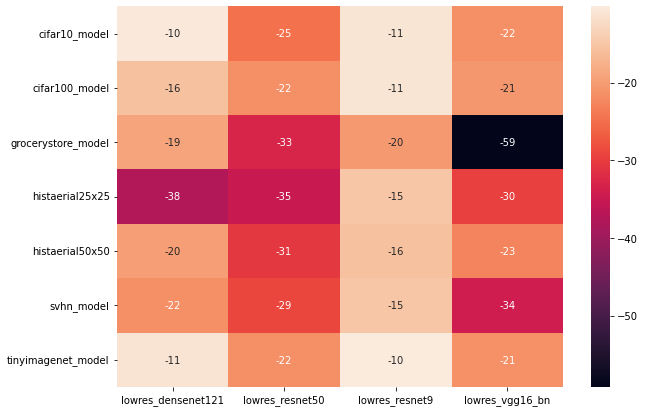

In [88]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

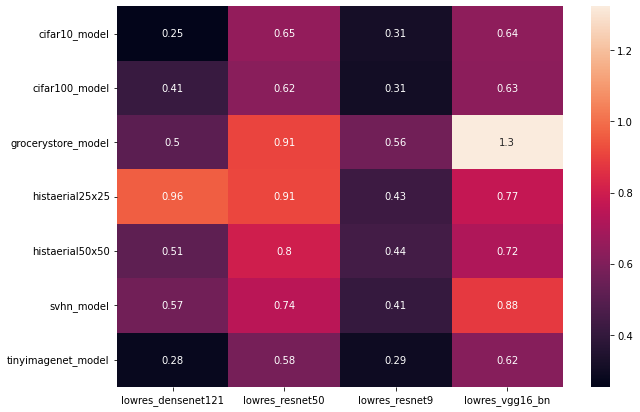

In [89]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 10
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 256)

### Parameters
- Learningrate: 1e-3
- Epochs: 20
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [90]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_64'),
              ('cifar10','version_65'),
              ('cifar10','version_66'),
              ('cifar10','version_67'),
              ('cifar10','version_68'),
              ('cifar10','version_69'),
              ('cifar10','version_70')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [91]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

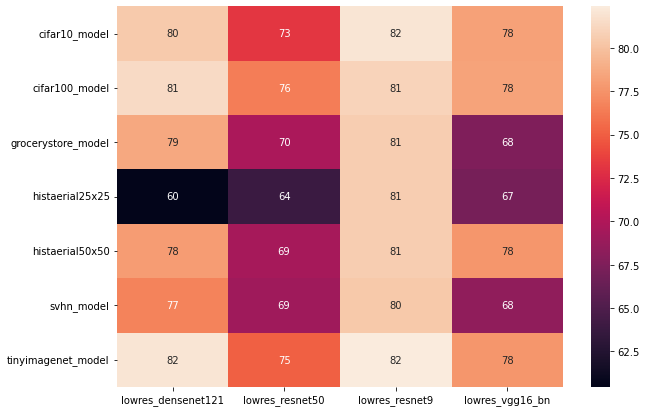

In [92]:
heatmap(matrix_acc_val,columns,all_models)

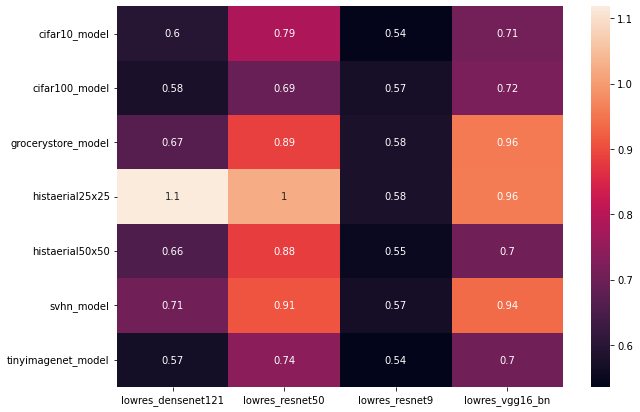

In [93]:
heatmap(matrix_loss_val,columns,all_models)

In [94]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [95]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

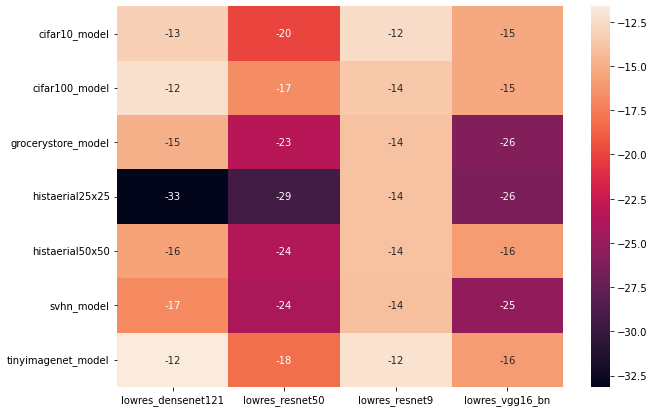

In [96]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

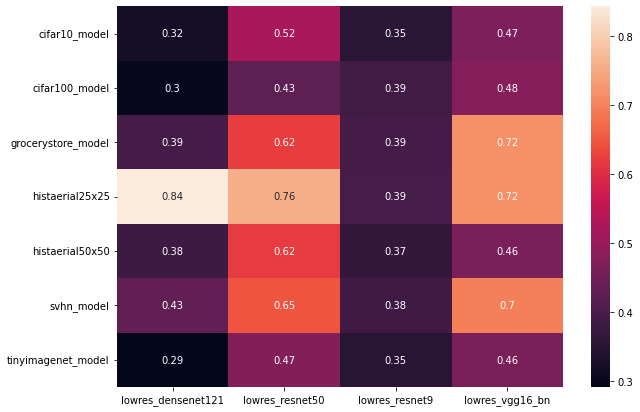

In [97]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 11
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-3
- Epochs: 30
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [98]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_71'),
              ('cifar10','version_72'),
              ('cifar10','version_73'),
              ('cifar10','version_74'),
              ('cifar10','version_75'),
              ('cifar10','version_76'),
              ('cifar10','version_77')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [99]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

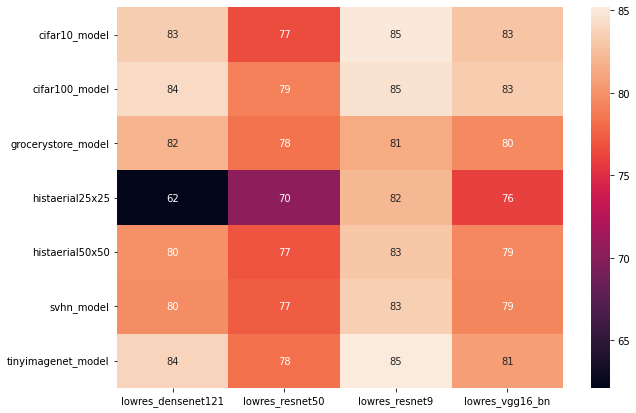

In [100]:
heatmap(matrix_acc_val,columns,all_models)

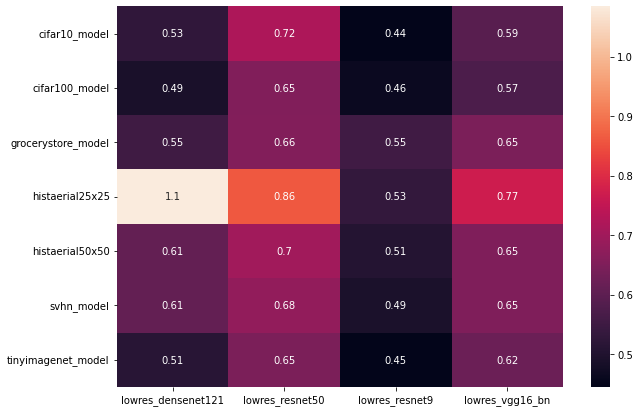

In [101]:
heatmap(matrix_loss_val,columns,all_models)

In [102]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [103]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

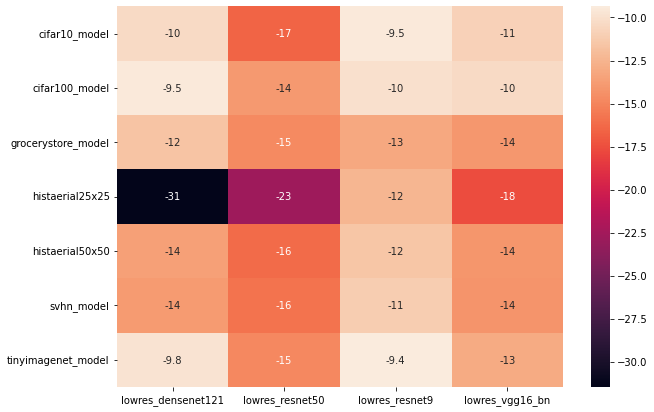

In [104]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

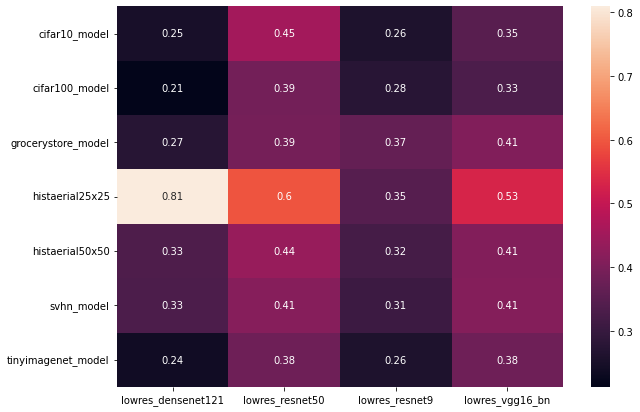

In [105]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 12
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-5
- Epochs: 15
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [106]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_78'),
              ('cifar10','version_79'),
              ('cifar10','version_80'),
              ('cifar10','version_81'),
              ('cifar10','version_82'),
              ('cifar10','version_83'),
              ('cifar10','version_84')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [107]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

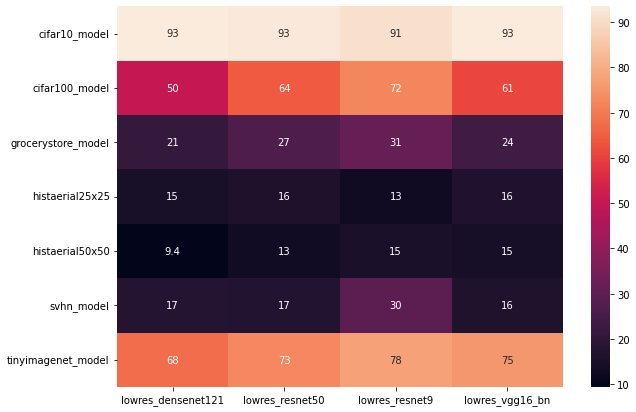

In [108]:
heatmap(matrix_acc_val,columns,all_models)

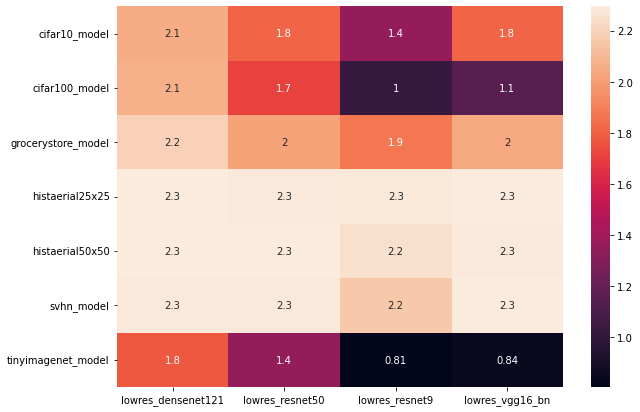

In [109]:
heatmap(matrix_loss_val,columns,all_models)

In [110]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [111]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

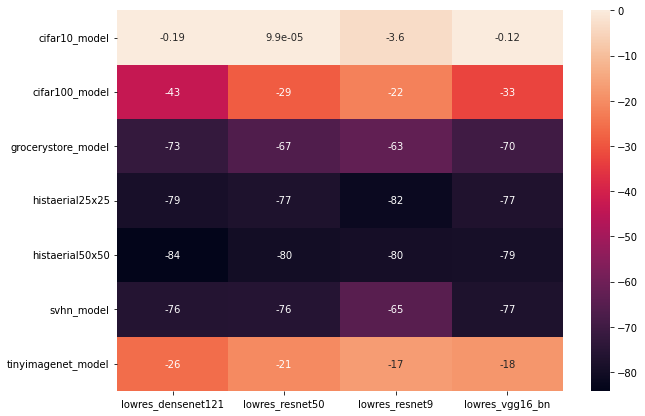

In [112]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

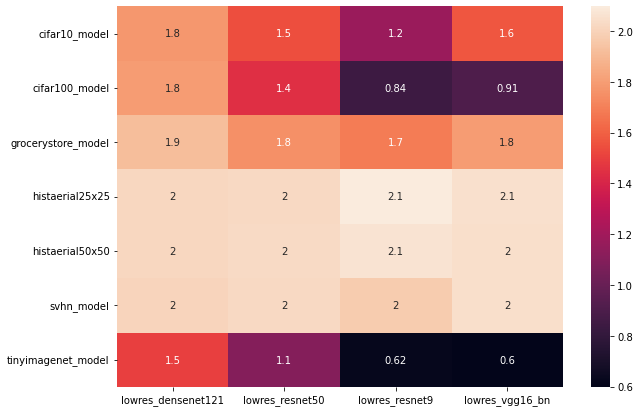

In [113]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 13
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-5
- Epochs: 15
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [114]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_85'),
              ('cifar10','version_86'),
              ('cifar10','version_87'),
              ('cifar10','version_88'),
              ('cifar10','version_89'),
              ('cifar10','version_90'),
              ('cifar10','version_91')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [115]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

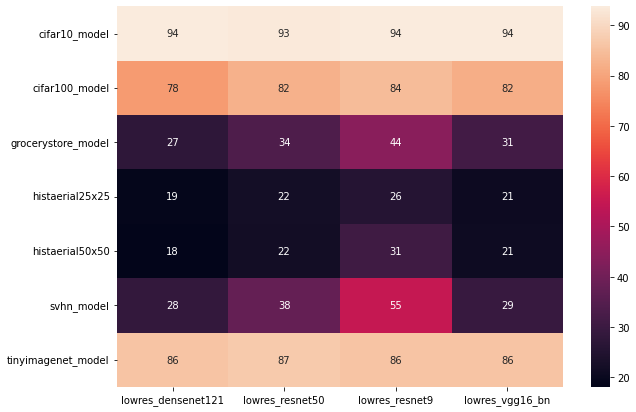

In [116]:
heatmap(matrix_acc_val,columns,all_models)

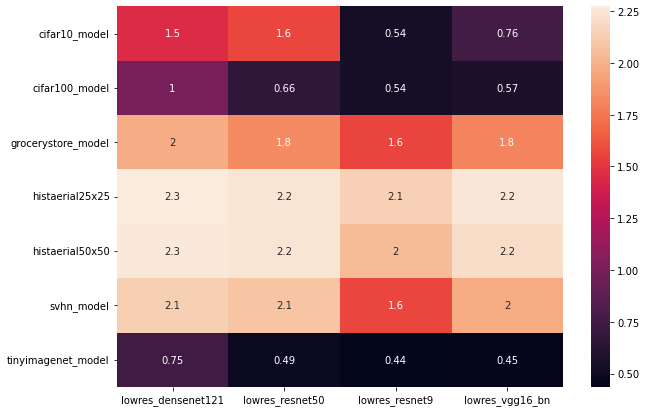

In [117]:
heatmap(matrix_loss_val,columns,all_models)

In [118]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [119]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

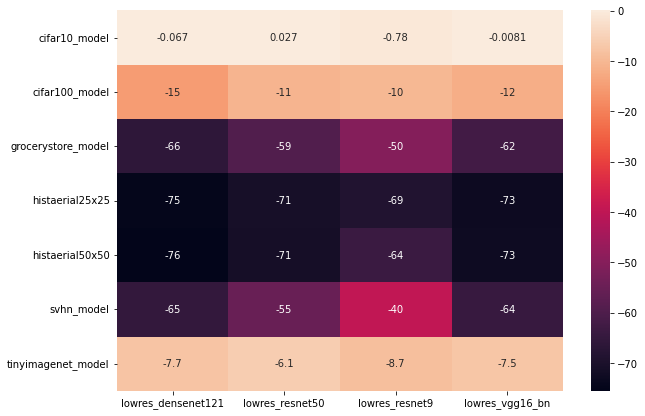

In [120]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

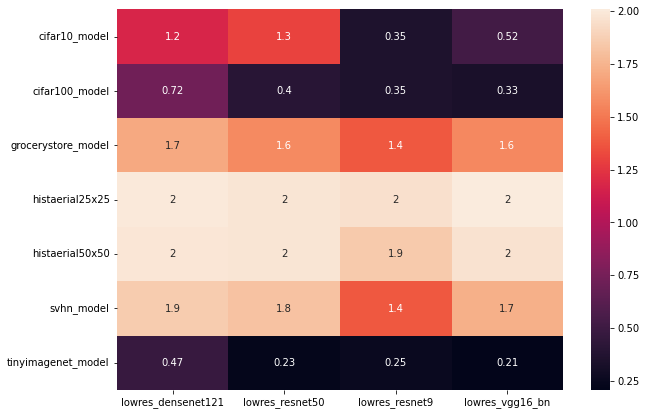

In [121]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 14
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-4
- Epochs: 15
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [122]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_92'),
              ('cifar10','version_93'),
              ('cifar10','version_94'),
              ('cifar10','version_95'),
              ('cifar10','version_96'),
              ('cifar10','version_97'),
              ('cifar10','version_98')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [123]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

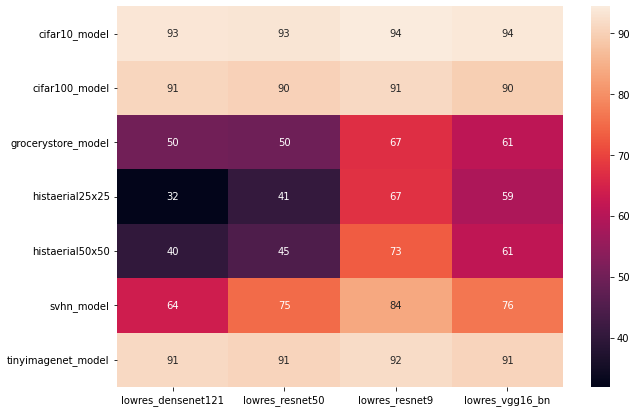

In [124]:
heatmap(matrix_acc_val,columns,all_models)

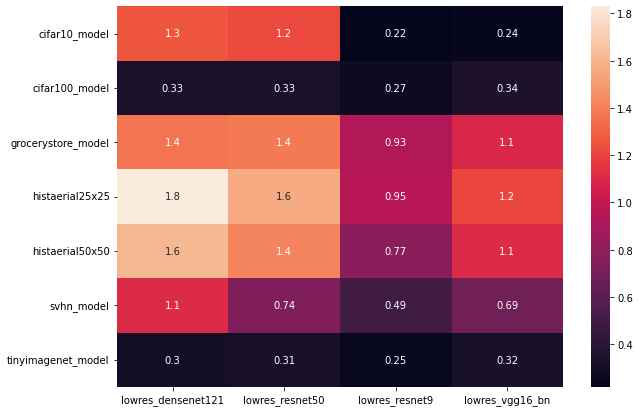

In [125]:
heatmap(matrix_loss_val,columns,all_models)

In [126]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [127]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

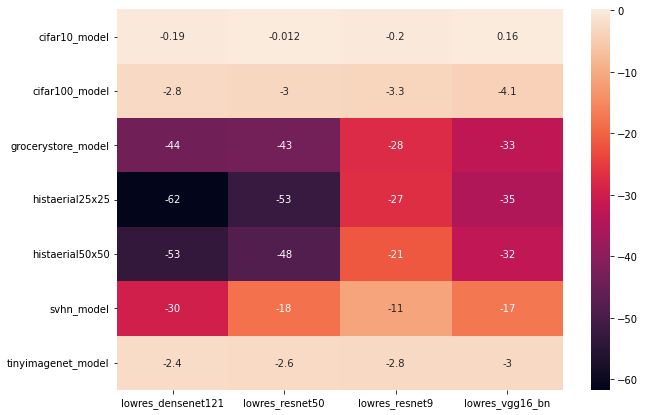

In [128]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

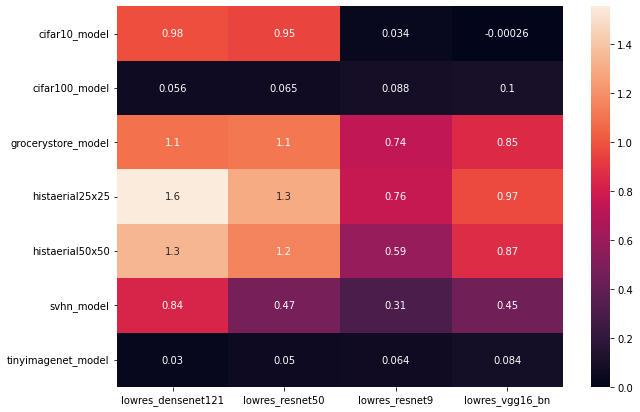

In [129]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 15
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 64)

### Parameters
- Learningrate: 1e-4
- Epochs: 15
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [130]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_99'),
              ('cifar10','version_100'),
              ('cifar10','version_101'),
              ('cifar10','version_102'),
              ('cifar10','version_103'),
              ('cifar10','version_104'),
              ('cifar10','version_105')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [131]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

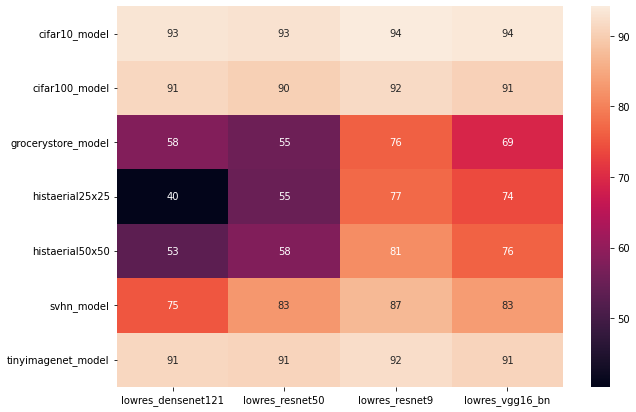

In [132]:
heatmap(matrix_acc_val,columns,all_models)

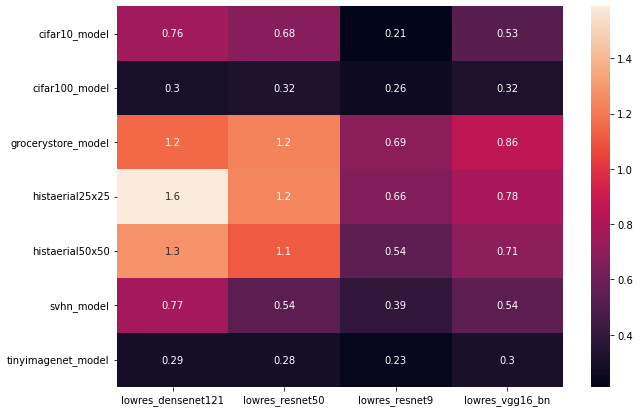

In [133]:
heatmap(matrix_loss_val,columns,all_models)

In [134]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [135]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

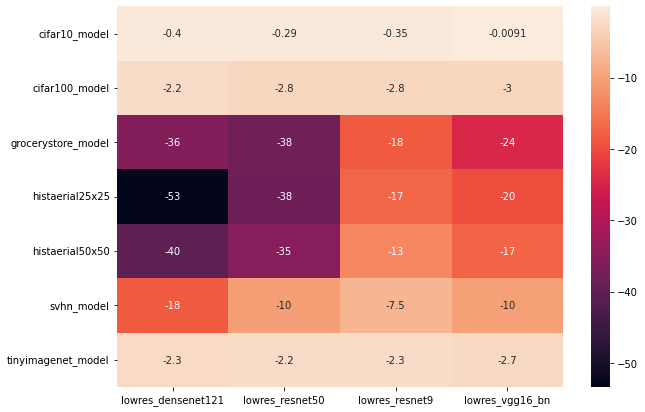

In [136]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

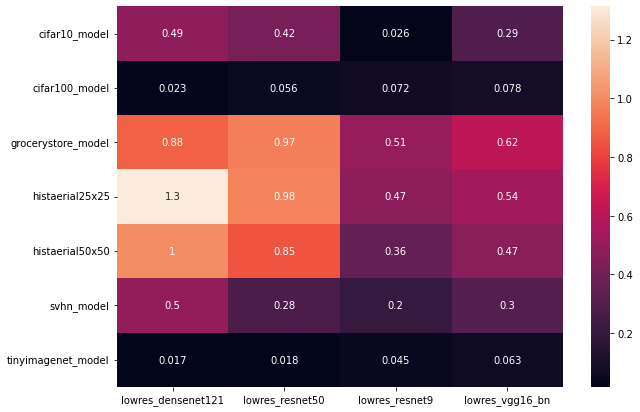

In [137]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 16
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 32)

### Parameters
- Learningrate: 1e-4
- Epochs: 20
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [138]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_106'),
              ('cifar10','version_107'),
              ('cifar10','version_108'),
              ('cifar10','version_109'),
              ('cifar10','version_110'),
              ('cifar10','version_111'),
              ('cifar10','version_112')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [139]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

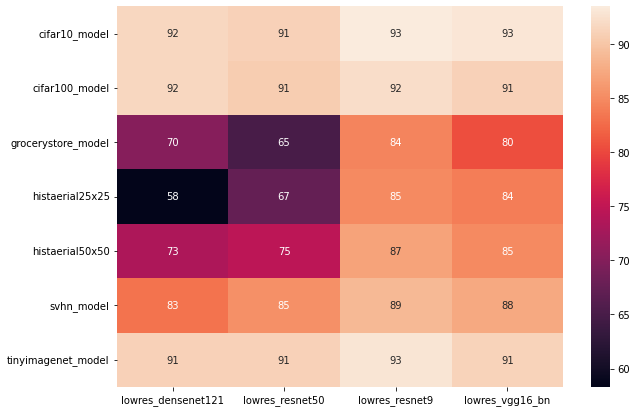

In [140]:
heatmap(matrix_acc_val,columns,all_models)

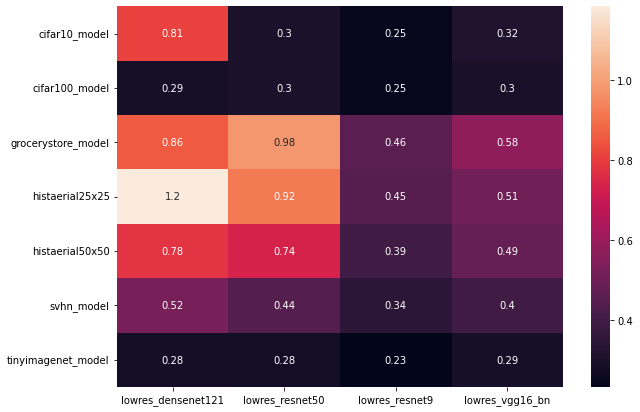

In [141]:
heatmap(matrix_loss_val,columns,all_models)

In [142]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [143]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

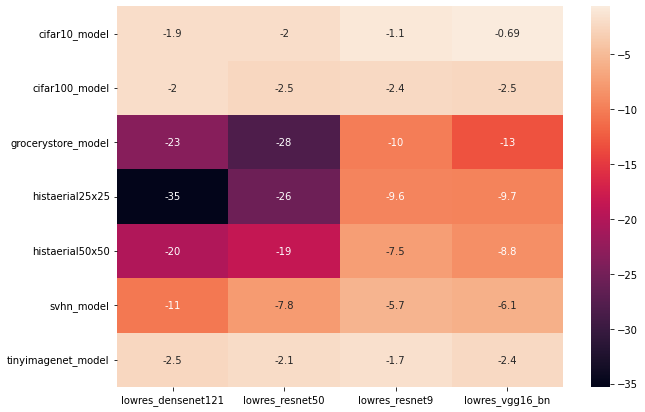

In [144]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

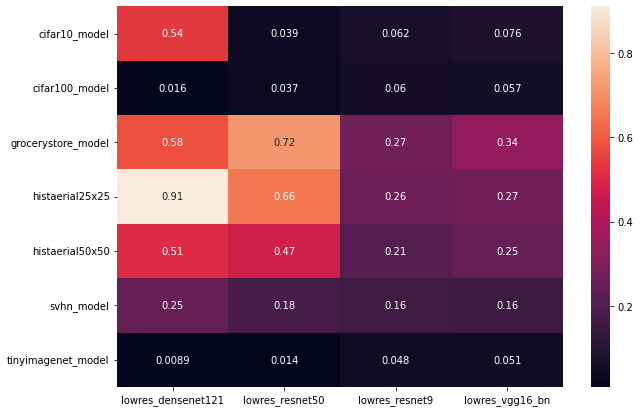

In [145]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 17
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 64)

### Parameters
- Learningrate: 1e-3
- Epochs: 20
- Optimizer: SGD

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [146]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_113'),
              ('cifar10','version_114'),
              ('cifar10','version_115'),
              ('cifar10','version_116'),
              ('cifar10','version_117'),
              ('cifar10','version_118'),
              ('cifar10','version_119')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [147]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

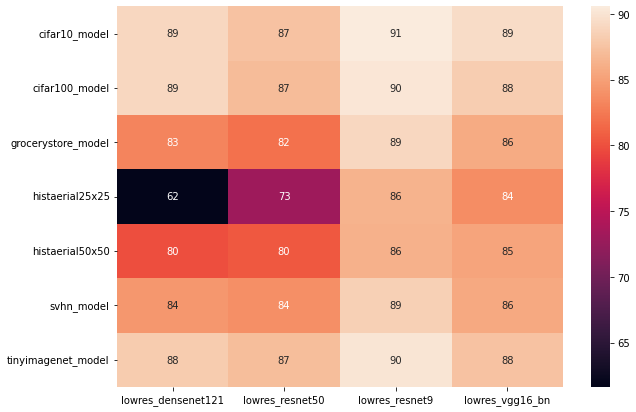

In [148]:
heatmap(matrix_acc_val,columns,all_models)

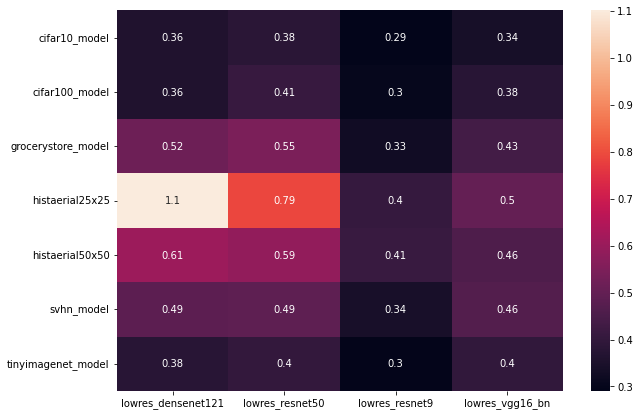

In [149]:
heatmap(matrix_loss_val,columns,all_models)

In [150]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [151]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

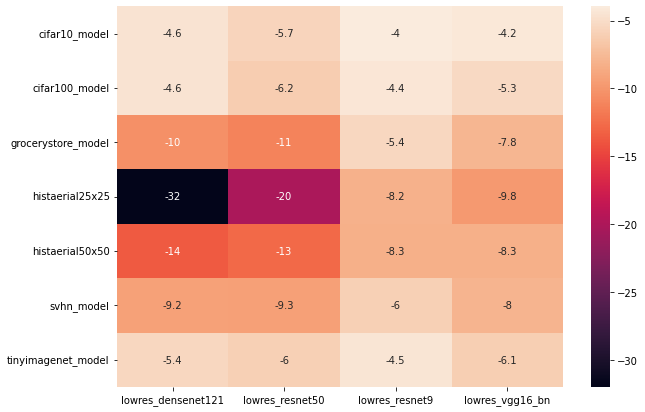

In [152]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

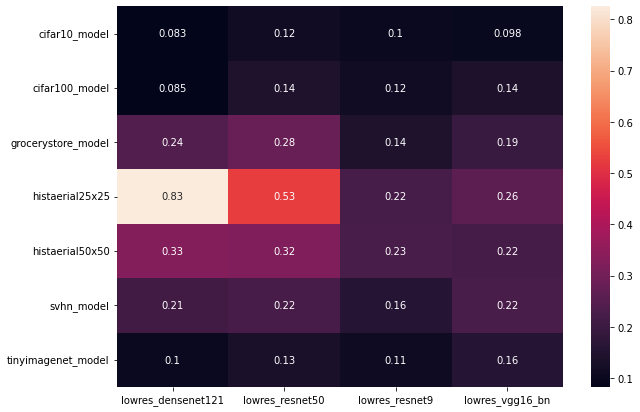

In [153]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 18
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Learningrate: 1e-5
- Epochs: 20
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [154]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_120'),
              ('cifar10','version_121'),
              ('cifar10','version_122'),
              ('cifar10','version_123'),
              ('cifar10','version_124'),
              ('cifar10','version_125'),
              ('cifar10','version_126')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [155]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

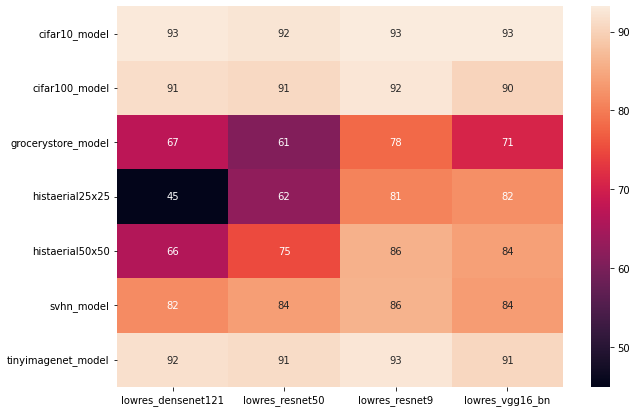

In [156]:
heatmap(matrix_acc_val,columns,all_models)

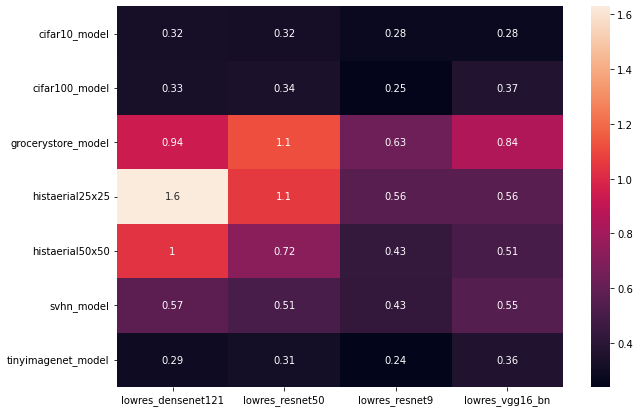

In [157]:
heatmap(matrix_loss_val,columns,all_models)

In [158]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [159]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

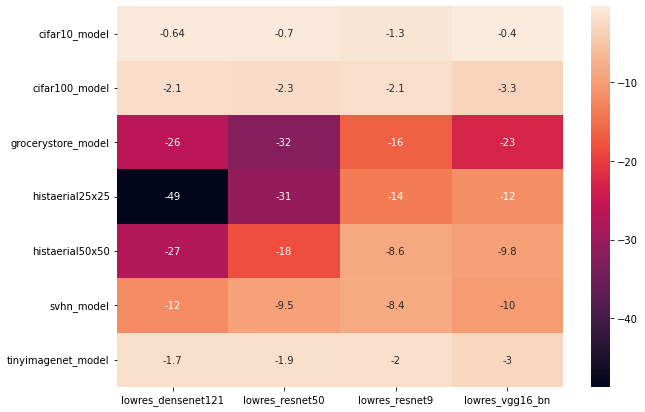

In [160]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

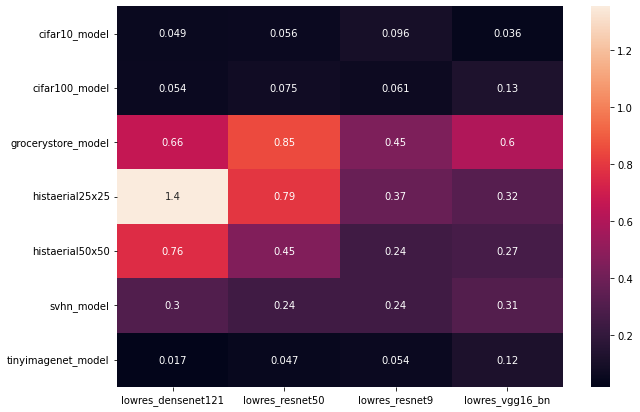

In [161]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 19
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 512)

### Parameters
- Learningrate: 1e-6
- Epochs: 20
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [162]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_127'),
              ('cifar10','version_128'),
              ('cifar10','version_129'),
              ('cifar10','version_130'),
              ('cifar10','version_131'),
              ('cifar10','version_132'),
              ('cifar10','version_133')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [163]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

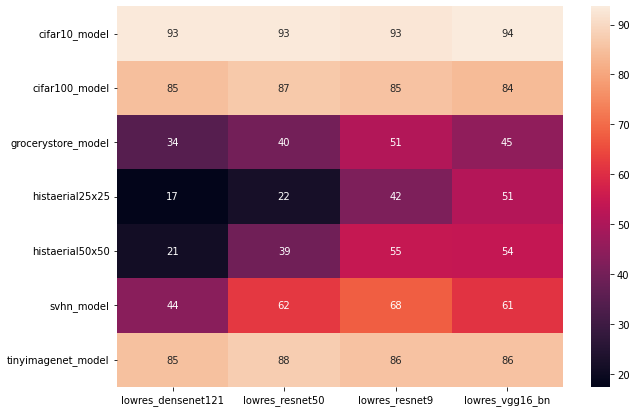

In [164]:
heatmap(matrix_acc_val,columns,all_models)

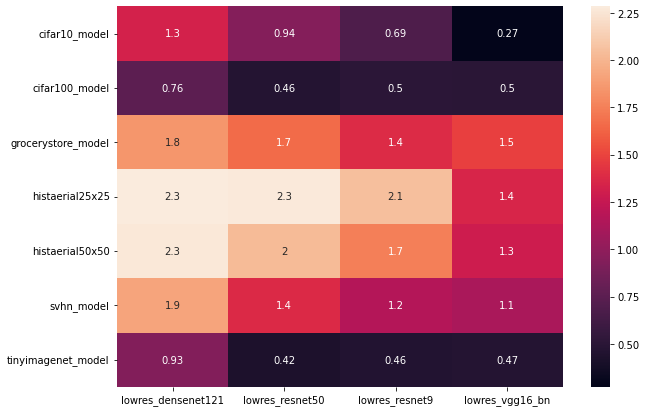

In [165]:
heatmap(matrix_loss_val,columns,all_models)

In [166]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [167]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

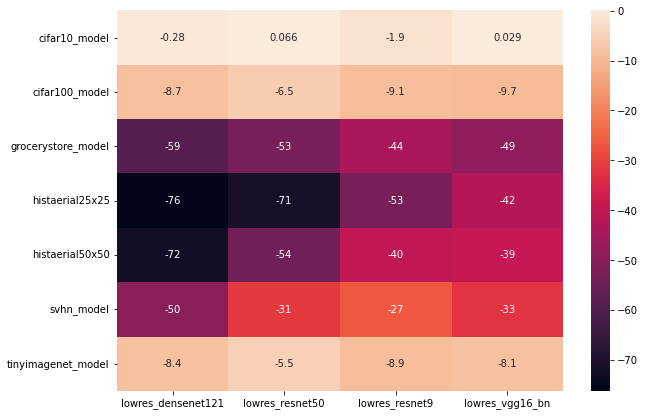

In [168]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

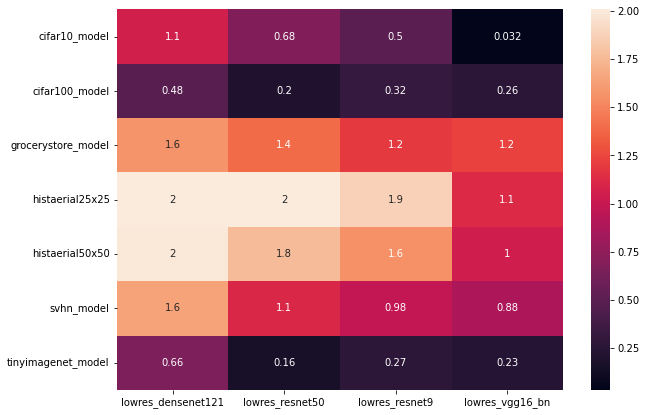

In [169]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 20
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 64)

### Parameters
- Learningrate: 1e-4
- Epochs: 20
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [170]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_134'),
              ('cifar10','version_135'),
              ('cifar10','version_136'),
              ('cifar10','version_137'),
              ('cifar10','version_138'),
              ('cifar10','version_139'),
              ('cifar10','version_140')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [171]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

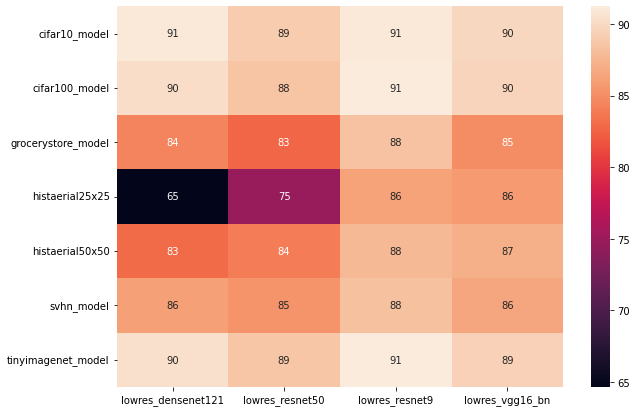

In [172]:
heatmap(matrix_acc_val,columns,all_models)

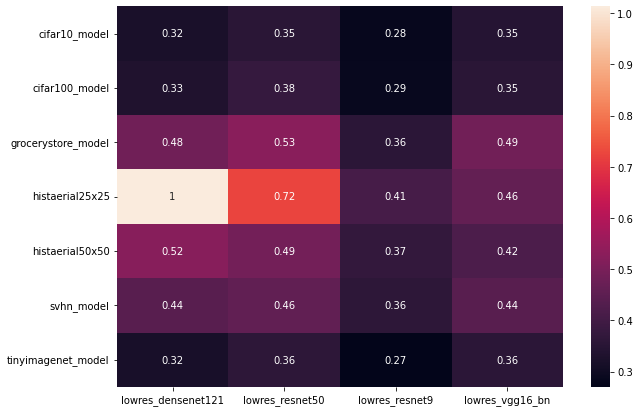

In [173]:
heatmap(matrix_loss_val,columns,all_models)

In [174]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [175]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

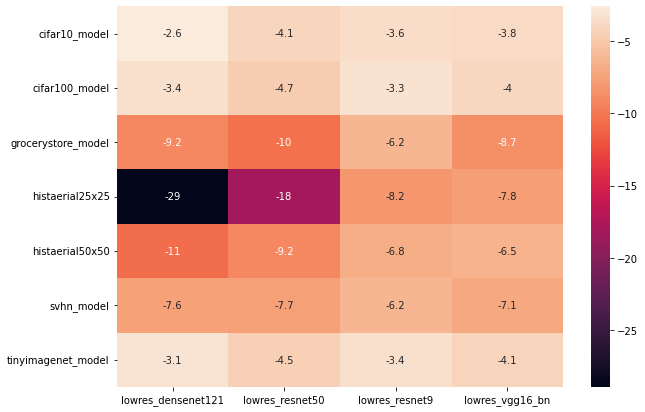

In [176]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

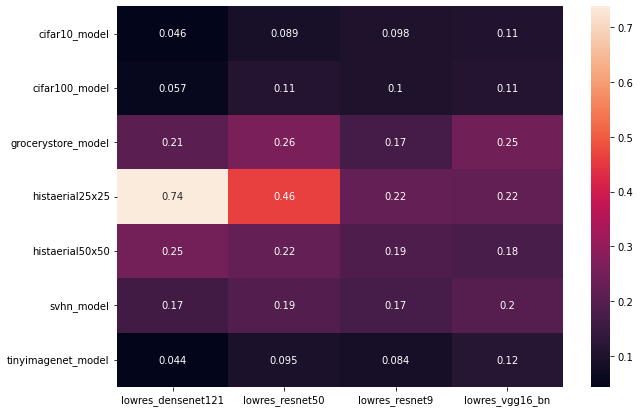

In [177]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning RUN 21
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 256)

### Parameters
- Learningrate: 1e-4
- Epochs: 20
- Optimizer: ADAM

Hint: This RUN performed with the fixed fc layer

### CIFAR-10

In [178]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_141'),
              ('cifar10','version_142'),
              ('cifar10','version_143'),
              ('cifar10','version_144'),
              ('cifar10','version_145'),
              ('cifar10','version_146'),
              ('cifar10','version_147')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    ("histaerial25x25",),
    ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [179]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

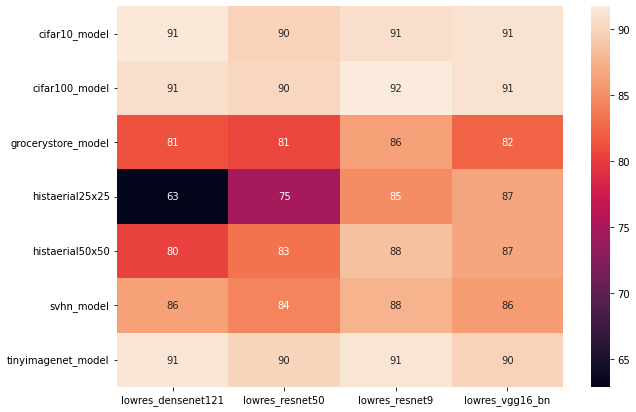

In [180]:
heatmap(matrix_acc_val,columns,all_models)

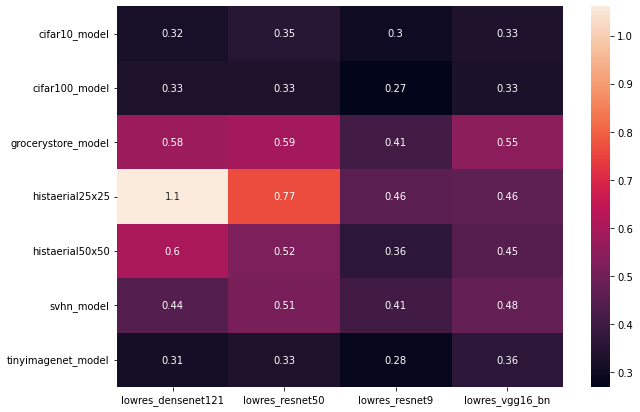

In [181]:
heatmap(matrix_loss_val,columns,all_models)

In [182]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [183]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

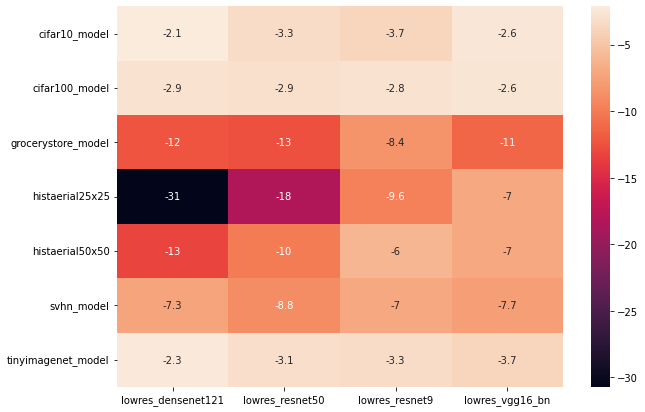

In [184]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

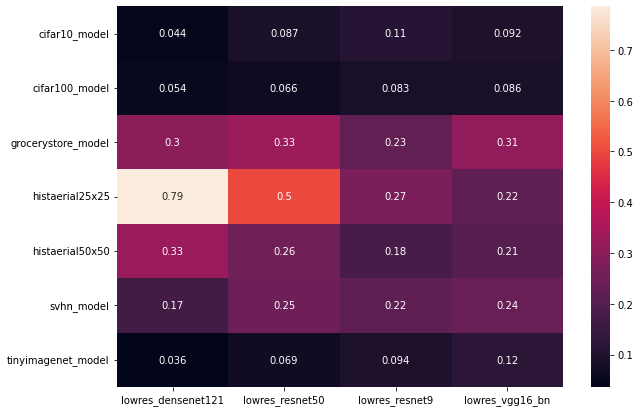

In [185]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)

## Finetuning Sweep RUN 1
### Models: 
- Densenet121
- Resnet50
- Resnet9
- VGG16

### Datasets:
- CIFAR10 (Batchsize: 128)

### Parameters
- Diverse

In [186]:
output_folder="output_sweep/"

### CIFAR-10

In [187]:
all_models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets=[('cifar10','version_1'),
              ('cifar10','version_2'),
              ('cifar10','version_3'),
              # ('cifar10','version_4'),
              # ('cifar10','version_5'),
              ('cifar10','version_4'),
              ('cifar10','version_5')]
columns=[
    ("cifar10_model",),
    ("cifar100_model",),
    ("grocerystore_model",),
    # ("histaerial25x25",),
    # ("histaerial50x50",),
    ("svhn_model",),
    ("tinyimagenet_model",),
        ]

In [189]:
matrix_acc_val,matrix_loss_val = get_accuracy_matrix(all_models,all_datasets)

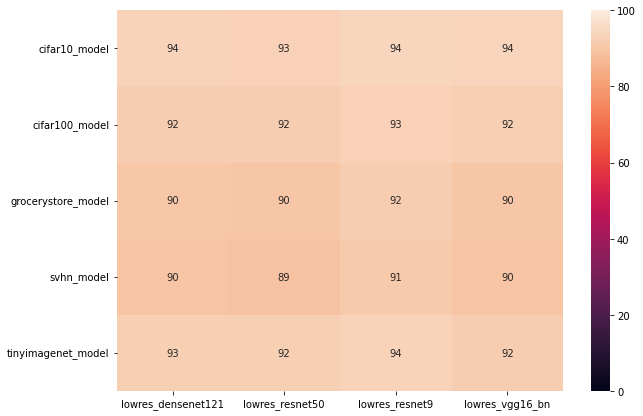

In [197]:
heatmap(matrix_acc_val,columns,all_models,(0,100))

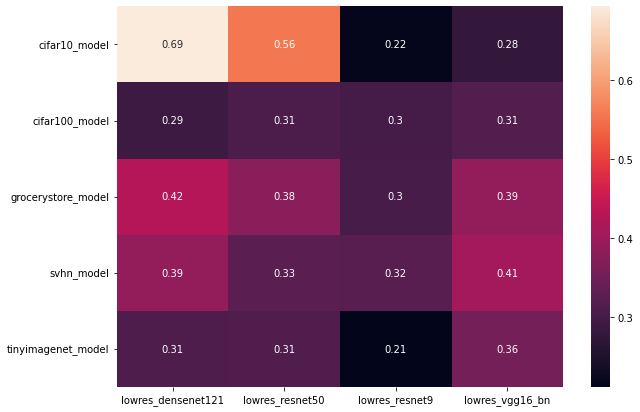

In [191]:
heatmap(matrix_loss_val,columns,all_models)

In [192]:
all_models_before=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
all_datasets_before=[('cifar10','version_0'),
              ('cifar10','version_0'),
              # ('fashionmnist','version_0'),
              # ('fractaldb60','version_1'),
              ('cifar10','version_0'),
              # ('cifar10','version_0'),
              # ('cifar10','version_0'),
              ('cifar10','version_0'),
              ('cifar10','version_0')]

In [193]:
matrix_acc_before_val,matrix_loss_before_val = get_accuracy_matrix(all_models_before,all_datasets_before)

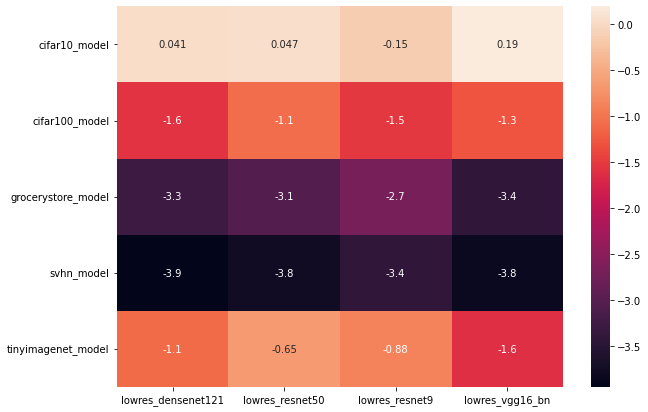

In [194]:
heatmap(matrix_acc_val-matrix_acc_before_val,columns,all_models)

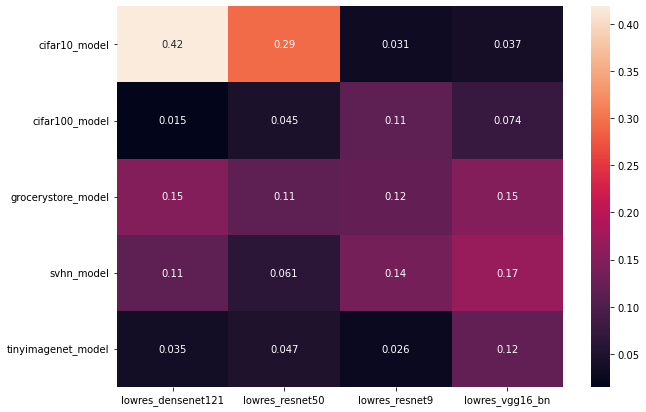

In [195]:
heatmap(matrix_loss_val-matrix_loss_before_val,columns,all_models)